In [ ]:
Data Load

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#sales_15 = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/2015_sales_data.csv')
#sales_16 = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/2016_sales_data.csv')
sales_17 = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/2017_sales_data.csv')
sales_18 = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/2018_sales_data.csv')
city     = pd.read_json('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/city_dict.json',typ='Series')
e_dis = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/expected_discount.csv')
h_dis = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/historical_discount.csv')
ff = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/foot_fall.csv')
product = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/product_information.csv')
test = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/test_data.csv')
test_id=pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/test_data.csv')

In [ ]:
Sales for 2015 and 2016 dropped to improve processing speed, 2017 data retained for any seasonality patterns

In [32]:
city=pd.DataFrame(city)
city.reset_index(level=0, inplace=True)
city.columns = ['city', 'city_name']

In [ ]:
Pre-Processing train data

In [17]:
Sales = pd.concat([sales_17,sales_18])
Sales_city=Sales.merge(city,how='left',on=['city','city'])
h_dis_pd=h_dis.melt(id_vars=["date", "product"], 
        var_name="city_name", 
        value_name="dis")
h_dis_pd['city_name']=h_dis_pd['city_name'].str.replace('Discount_','')
Sales_dis=pd.merge(Sales_city,h_dis_pd,how='left',left_on=['date','product','city_name'], right_on = ['date','product','city_name'])
Sales_prod=pd.merge(Sales_dis,product,how='left',on=['product','product'])
train=Sales_prod


In [ ]:
Adding features (day, weekend flag, date etc.)

In [ ]:
Weekend flag added as sales/footfall generally increases on weekends

In [18]:
train['datetime'] = pd.to_datetime(train['date'])

train['weekday'] = train['datetime'].dt.dayofweek
train['monthday']= train['datetime'].dt.day
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['weekend']= train['weekday'].apply(lambda x:1 if x>4 else 0 )
#train['sunday_or_monday']= train['weekday'].apply(lambda x:1 if x>5 or x<1 else 0 )
#train['hour']= train['datetime'].apply(lambda x:x.hour )
#train['peak_hour']=train['hour'].apply(lambda x:1 if x<6 or x>19 else 0)
#train['time_filter']=train['hour'].apply(lambda x:1 if x is 2 or x is 4 else 0 )
#train['date_filter']=train['monthday'].apply(lambda x:1 if x is 23 or x is 30 else 0 )
train.drop(['date','city'],axis=1,inplace=True)
train


,product,sales,city_name,dis,product_category,product_subcategory,var_1,var_2,var_3,var_4,...,var_7,var_8,var_9,var_10,datetime,weekday,monthday,month,year,weekend
0,1,28.0,Kolkata,1.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,...,0.08,0.416806,1.171543,0.668805,2017-01-02,0,2,1,2017,0
1,2,72.0,Kolkata,NaN,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,...,0.08,0.545467,0.541547,0.401800,2017-01-02,0,2,1,2017,0
2,3,128.0,Kolkata,NaN,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,...,0.08,0.521452,0.945024,0.631538,2017-01-02,0,2,1,2017,0
3,4,20.0,Kolkata,NaN,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,...,0.08,0.519929,0.635492,0.991901,2017-01-02,0,2,1,2017,0
4,5,4.0,Kolkata,0.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,...,0.08,0.462138,0.574709,0.792799,2017-01-02,0,2,1,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253422,3163,4.0,Lucknow,NaN,Cat_3565,SubCat_8141,0.626706,0.306125,0.605751,0.0003,...,0.08,0.479873,0.864287,0.534201,2018-04-30,0,30,4,2018,0
10253423,3164,44.0,Lucknow,NaN,Cat_155,SubCat_3382,0.987666,0.288789,0.525120,0.0003,...,0.08,0.486923,0.767590,0.622735,2018-04-30,0,30,4,2018,0
10253424,3157,16.0,Lucknow,NaN,Cat_1172,SubCat_656,0.835704,0.294445,0.480917,0.0003,...,0.08,0.517138,0.962005,0.559423,2018-04-30,0,30,4,2018,0
10253425,3165,88.0,Lucknow,NaN,Cat_2034,SubCat_1380,0.381019,0.289314,0.455419,0.0003,...,0.08,0.433013,0.690022,0.796410,2018-04-30,0,30,4,2018,0


In [ ]:
Looking for additional features at weekday level 

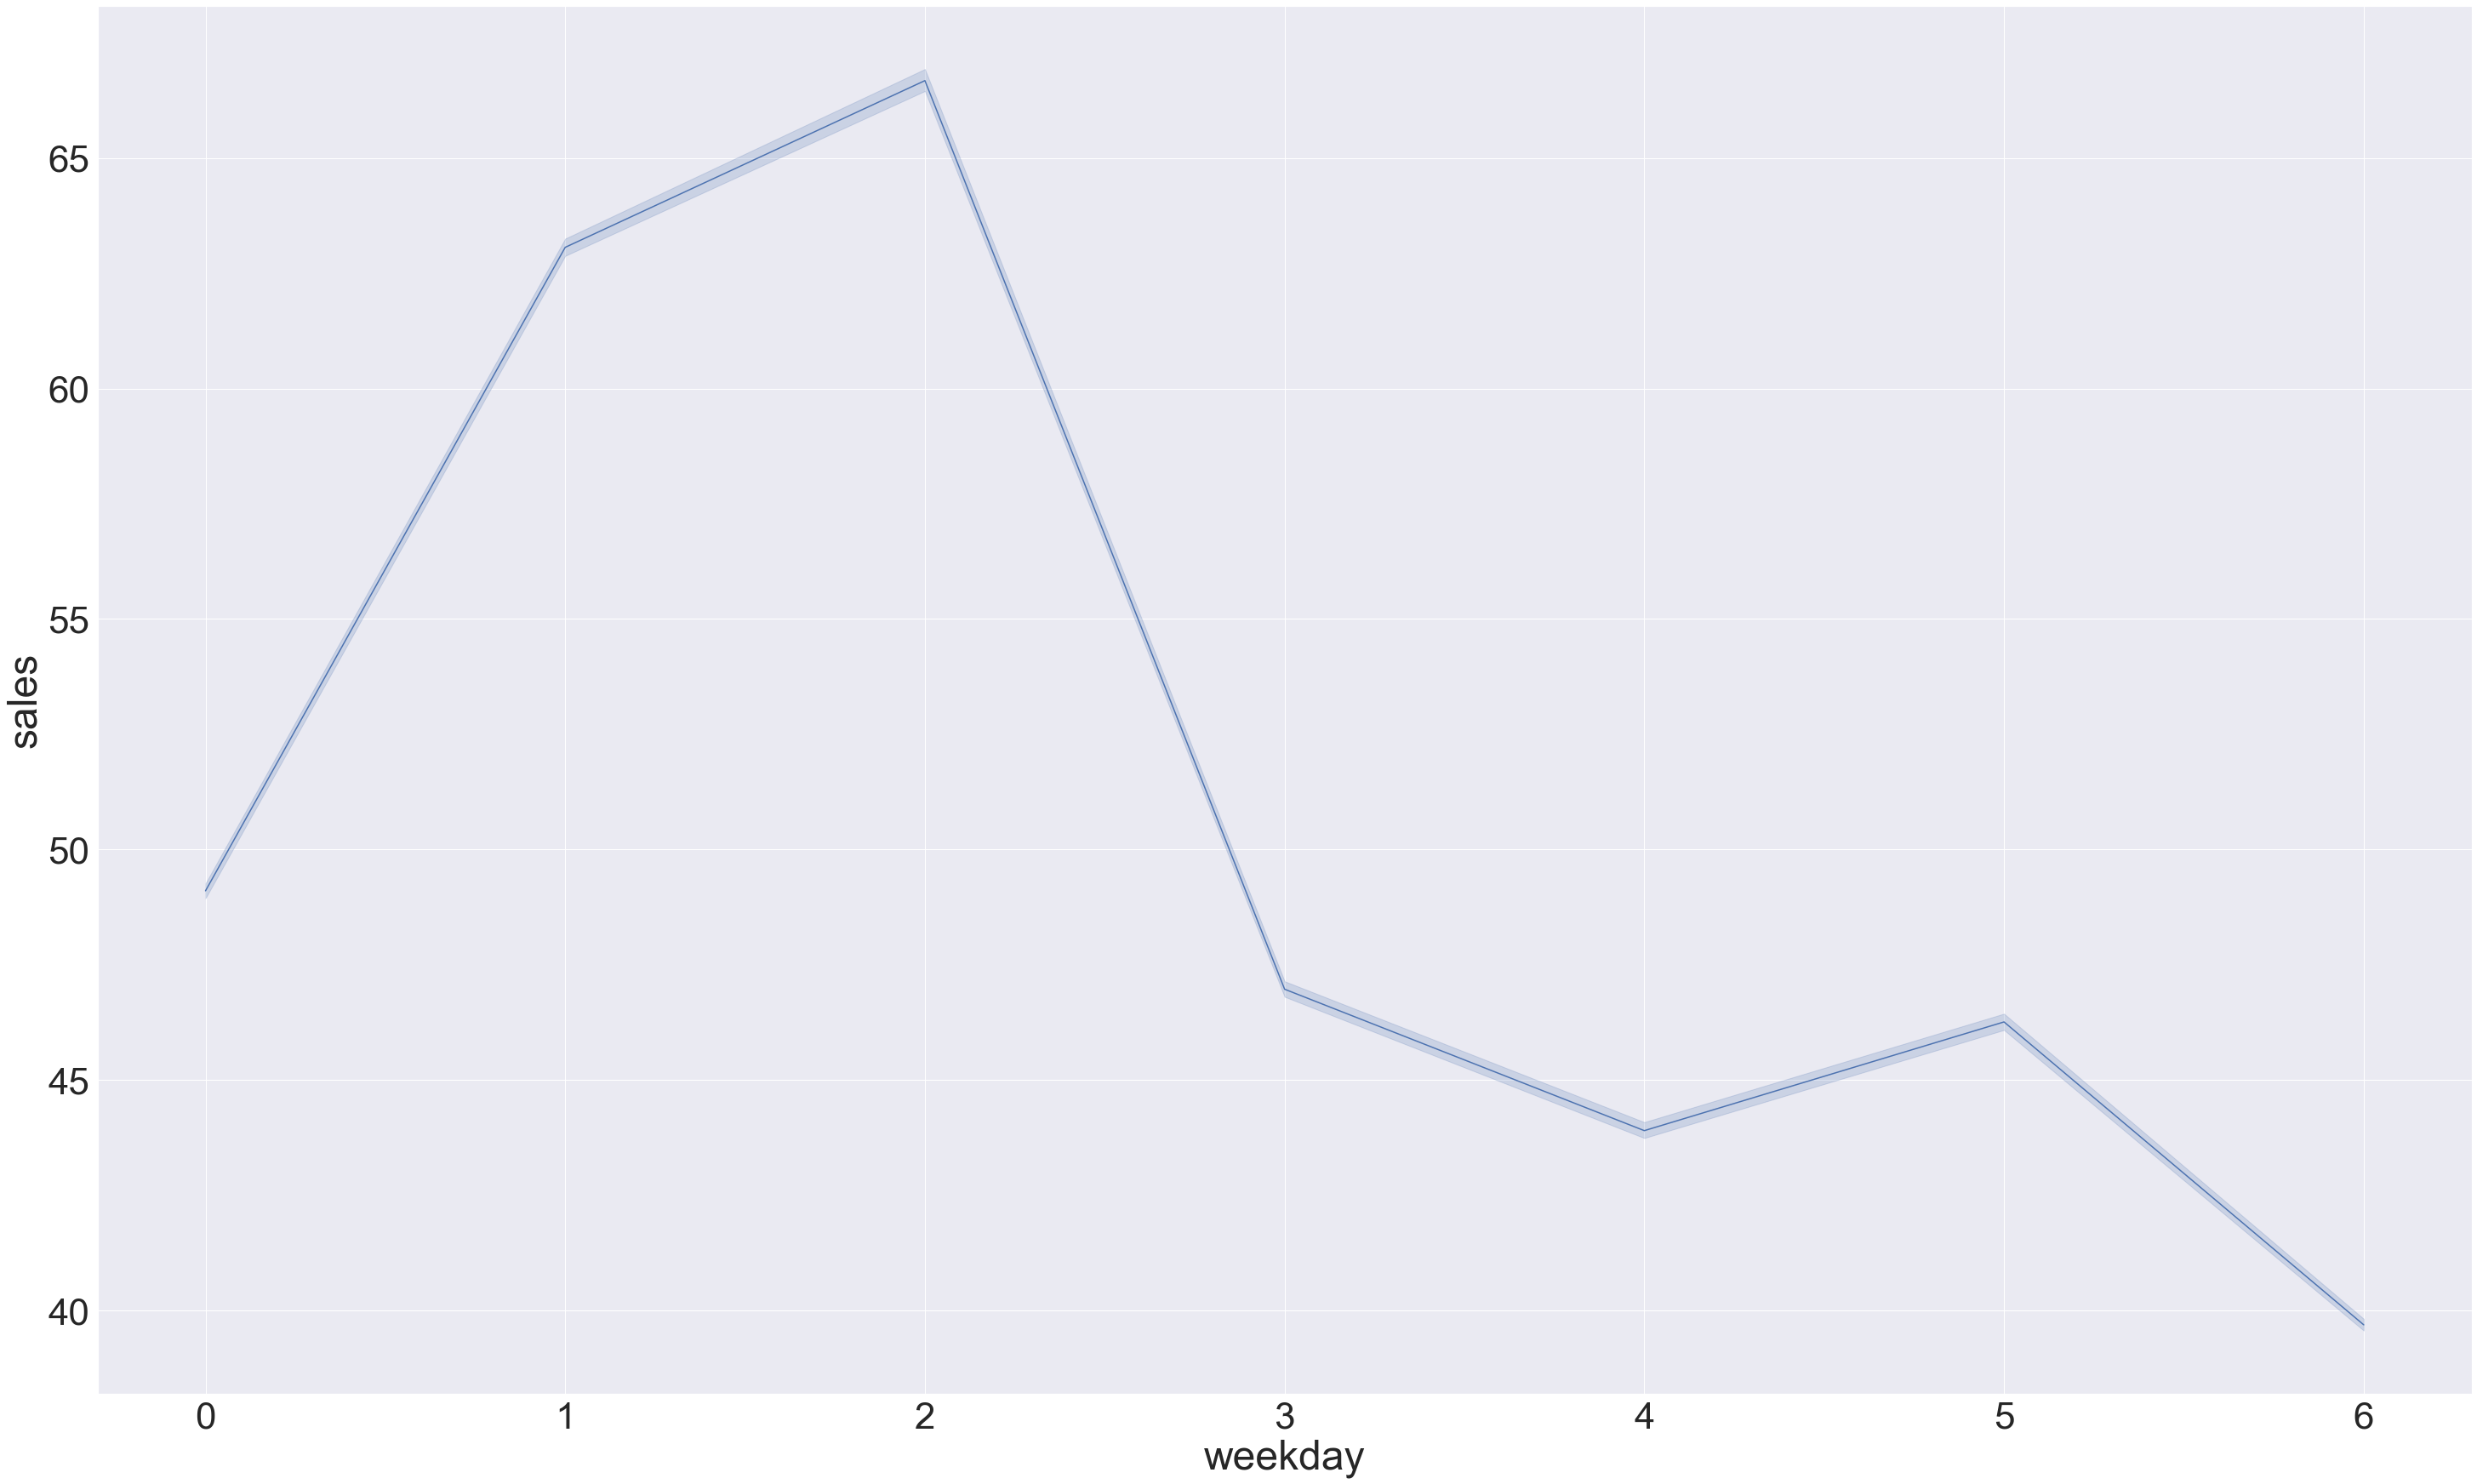

In [20]:
sns.set(font_scale = 4)
plt.rcParams["figure.figsize"] = (50, 30)
#plt.rcParams["axes.labelsize"] = 100
ax = sns.lineplot(x="weekday", y="sales", data=train)
#hue="Course_Domain",
#hue="Course_Domain",

In [ ]:
Looking for additional features at monthday (date) level 

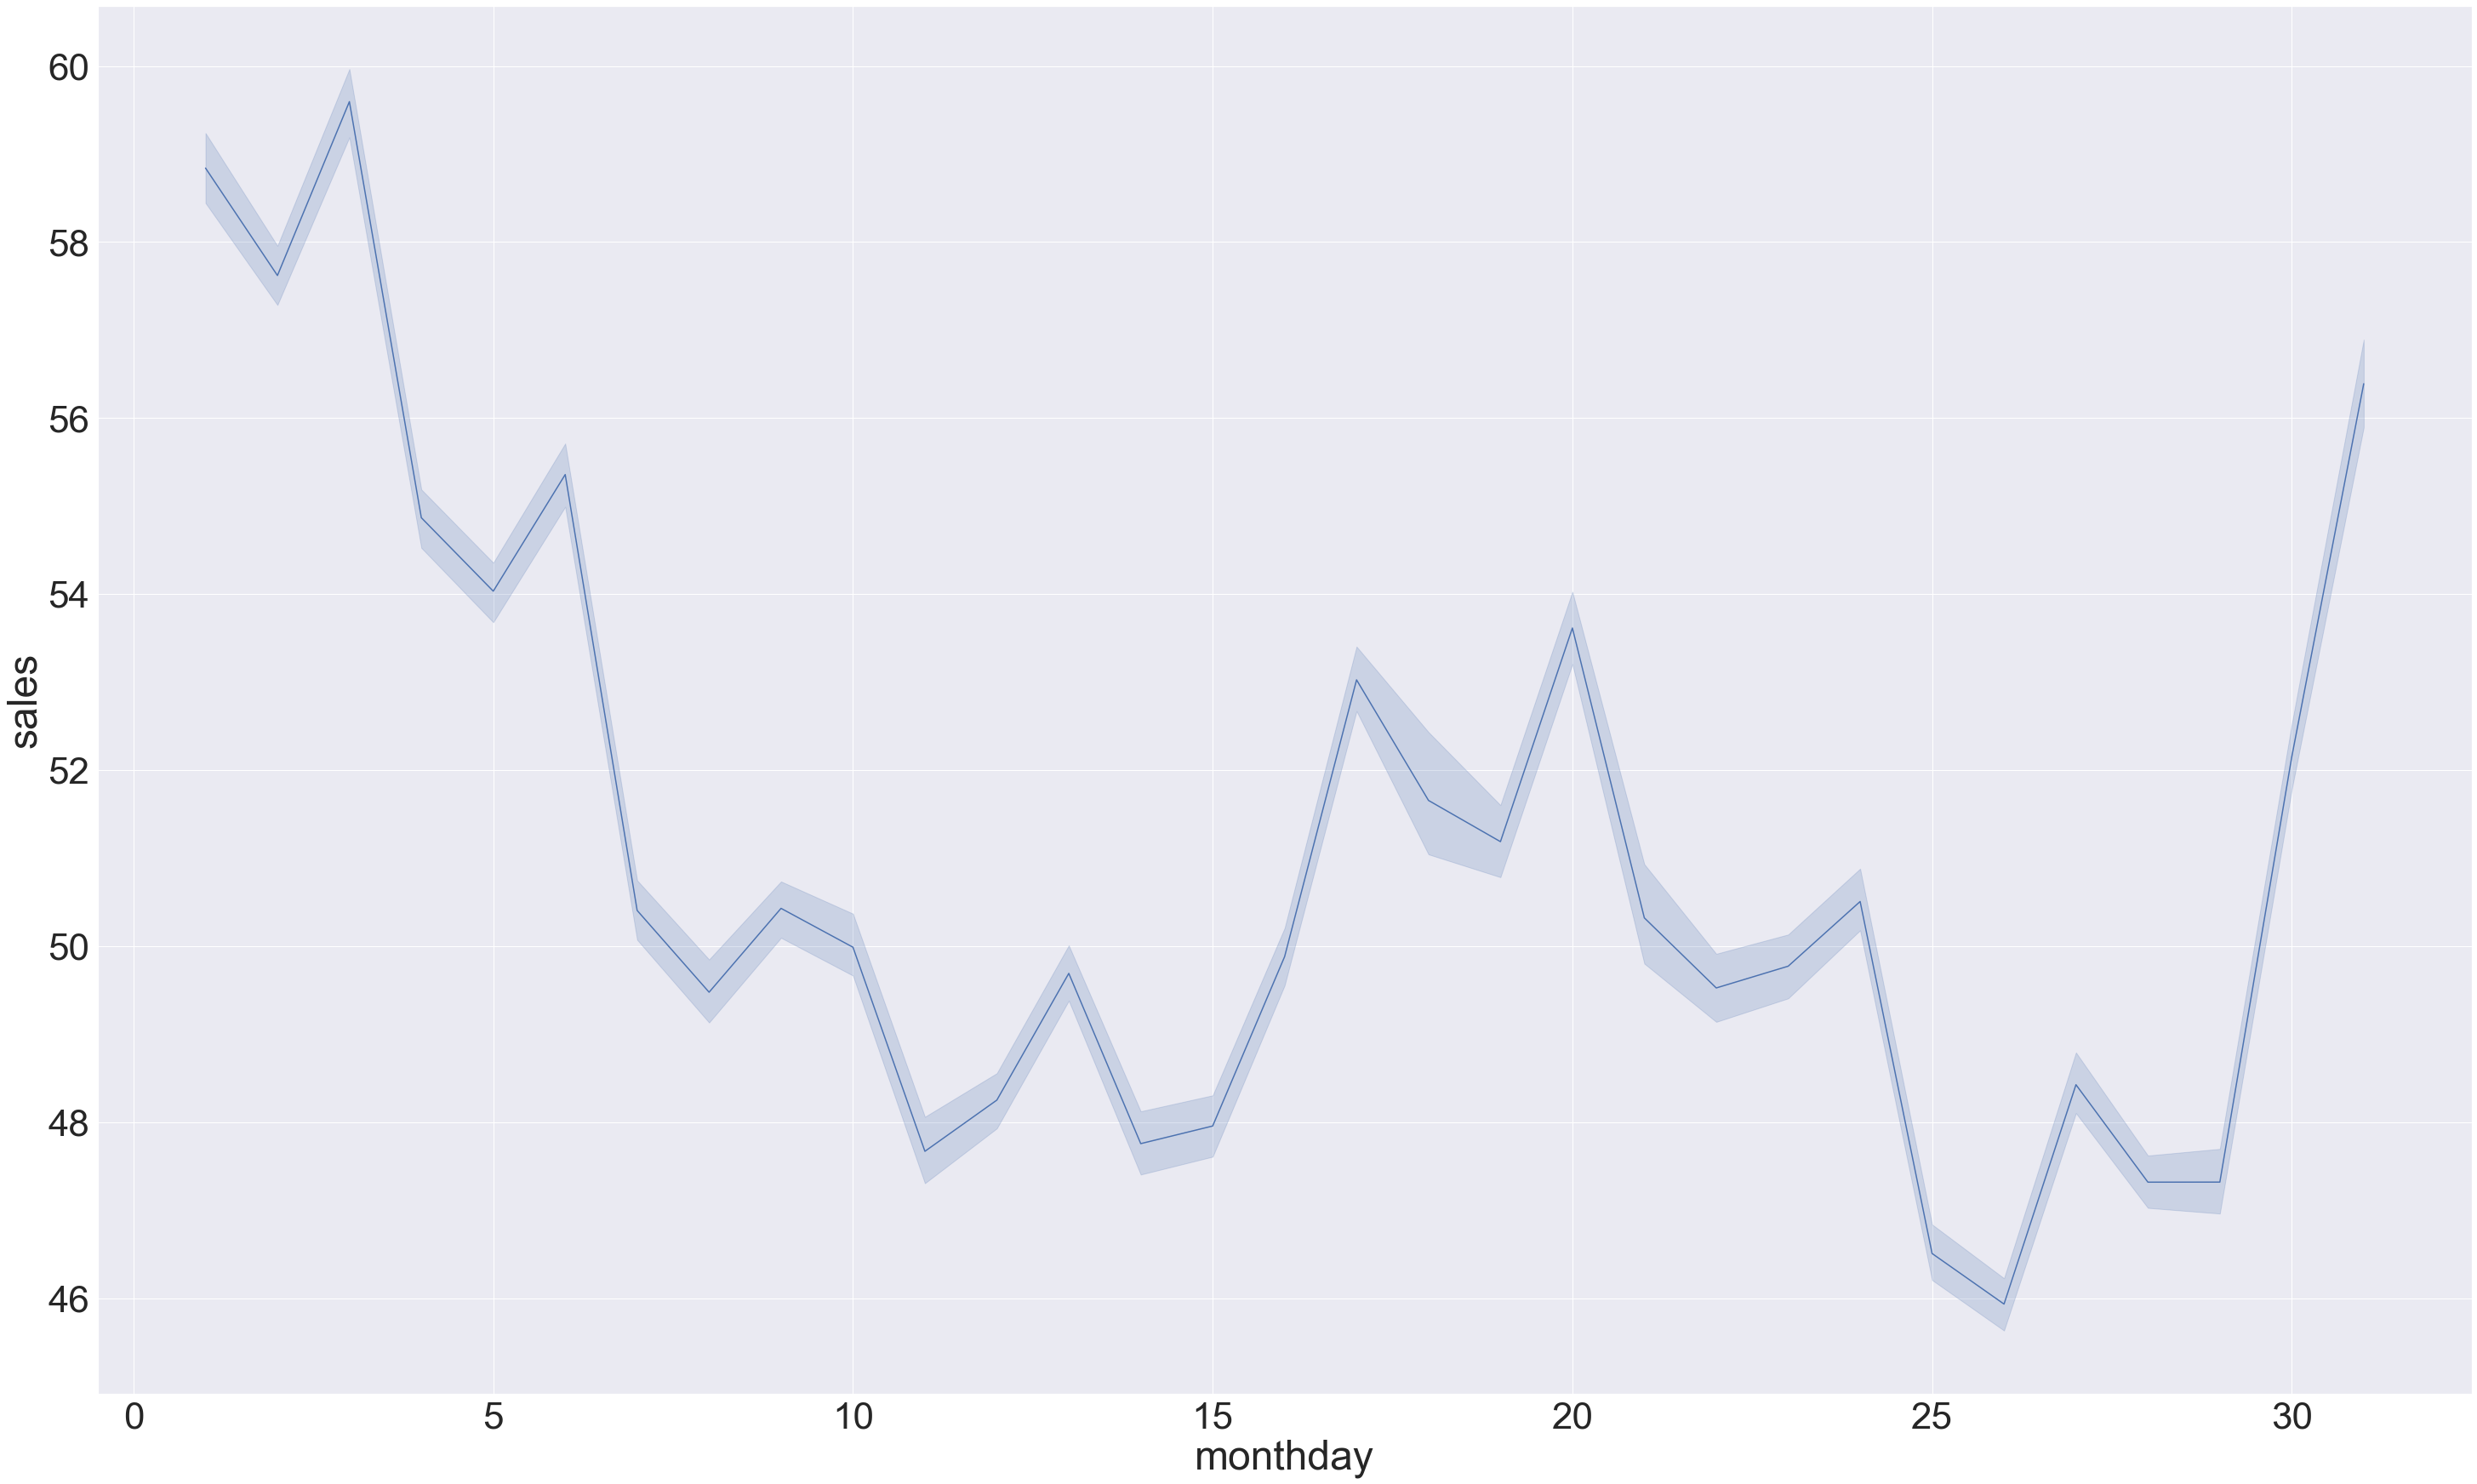

In [21]:

sns.set(font_scale = 4)
plt.rcParams["figure.figsize"] = (50, 30)
#plt.rcParams["axes.labelsize"] = 100
ax = sns.lineplot(x="monthday", y="sales", data=train)
#hue="Course_Domain",
#hue="Course_Domain",

In [ ]:
No clear pattern emerges and hence no new features added

In [ ]:
Pivot down footfall data

In [22]:
ff_train=ff.melt(id_vars=["city"], 
        var_name="datetime", 
        value_name="ff")
ff_train['datetime'] = pd.to_datetime(ff_train['datetime'])


train=train.merge(ff_train,how='left',left_on=['city_name','datetime'],right_on=['city','datetime'])
train

,product,sales,city_name,dis,product_category,product_subcategory,var_1,var_2,var_3,var_4,...,var_9,var_10,datetime,weekday,monthday,month,year,weekend,city,ff
0,1,28.0,Kolkata,1.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,...,1.171543,0.668805,2017-01-02,0,2,1,2017,0,Kolkata,13716.0
1,2,72.0,Kolkata,NaN,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,...,0.541547,0.401800,2017-01-02,0,2,1,2017,0,Kolkata,13716.0
2,3,128.0,Kolkata,NaN,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,...,0.945024,0.631538,2017-01-02,0,2,1,2017,0,Kolkata,13716.0
3,4,20.0,Kolkata,NaN,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,...,0.635492,0.991901,2017-01-02,0,2,1,2017,0,Kolkata,13716.0
4,5,4.0,Kolkata,0.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,...,0.574709,0.792799,2017-01-02,0,2,1,2017,0,Kolkata,13716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253422,3163,4.0,Lucknow,NaN,Cat_3565,SubCat_8141,0.626706,0.306125,0.605751,0.0003,...,0.864287,0.534201,2018-04-30,0,30,4,2018,0,Lucknow,13712.0
10253423,3164,44.0,Lucknow,NaN,Cat_155,SubCat_3382,0.987666,0.288789,0.525120,0.0003,...,0.767590,0.622735,2018-04-30,0,30,4,2018,0,Lucknow,13712.0
10253424,3157,16.0,Lucknow,NaN,Cat_1172,SubCat_656,0.835704,0.294445,0.480917,0.0003,...,0.962005,0.559423,2018-04-30,0,30,4,2018,0,Lucknow,13712.0
10253425,3165,88.0,Lucknow,NaN,Cat_2034,SubCat_1380,0.381019,0.289314,0.455419,0.0003,...,0.690022,0.796410,2018-04-30,0,30,4,2018,0,Lucknow,13712.0


In [ ]:
Corelation heat map plot for product information

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

df = product

corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

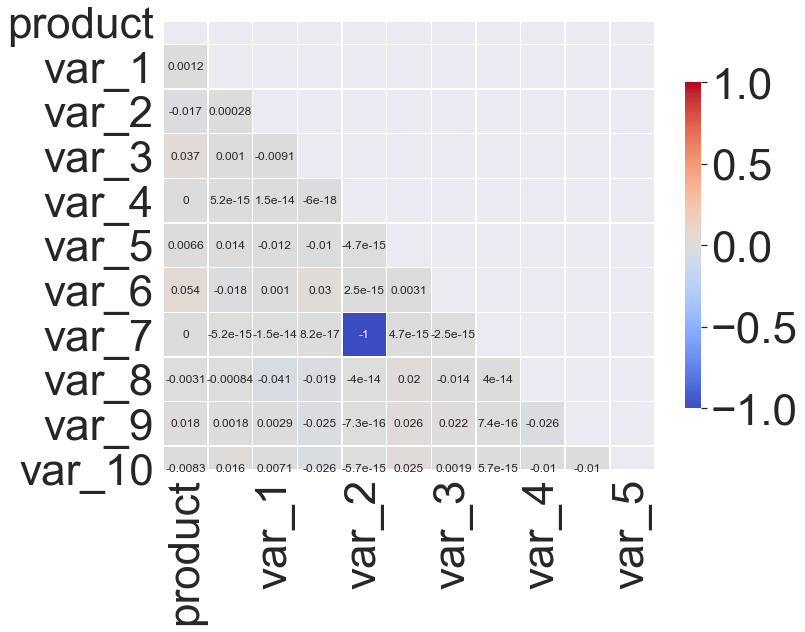

In [24]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
var 4 and 7 are corelated, infact they are meaningless (due to same value throughout) and hence dropped 

In [25]:
train.drop(['datetime','city'],axis=1,inplace=True)
train['product'] = train['product'].astype(object)
train.drop(['var_4','var_7'],axis=1,inplace=True)
train

,product,sales,city_name,dis,product_category,product_subcategory,var_1,var_2,var_3,var_5,var_6,var_8,var_9,var_10,weekday,monthday,month,year,weekend,ff
0,1,28.0,Kolkata,1.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.363847,0.300629,0.416806,1.171543,0.668805,0,2,1,2017,0,13716.0
1,2,72.0,Kolkata,NaN,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.409503,0.465912,0.545467,0.541547,0.401800,0,2,1,2017,0,13716.0
2,3,128.0,Kolkata,NaN,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.168459,0.517364,0.521452,0.945024,0.631538,0,2,1,2017,0,13716.0
3,4,20.0,Kolkata,NaN,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.291839,0.302639,0.519929,0.635492,0.991901,0,2,1,2017,0,13716.0
4,5,4.0,Kolkata,0.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.286037,0.822326,0.462138,0.574709,0.792799,0,2,1,2017,0,13716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253422,3163,4.0,Lucknow,NaN,Cat_3565,SubCat_8141,0.626706,0.306125,0.605751,0.299796,0.772688,0.479873,0.864287,0.534201,0,30,4,2018,0,13712.0
10253423,3164,44.0,Lucknow,NaN,Cat_155,SubCat_3382,0.987666,0.288789,0.525120,0.242951,0.706291,0.486923,0.767590,0.622735,0,30,4,2018,0,13712.0
10253424,3157,16.0,Lucknow,NaN,Cat_1172,SubCat_656,0.835704,0.294445,0.480917,0.274677,0.552664,0.517138,0.962005,0.559423,0,30,4,2018,0,13712.0
10253425,3165,88.0,Lucknow,NaN,Cat_2034,SubCat_1380,0.381019,0.289314,0.455419,0.151069,0.892825,0.433013,0.690022,0.796410,0,30,4,2018,0,13712.0


In [ ]:
Pre-processing for missing value imputation (footfall)

In [26]:
train_cat=train.drop(['ff'],axis=1)
train_num=train.drop(['product', 'sales', 'city_name', 'product_category',
       'product_subcategory', 'var_1', 'var_2', 'var_3', 'var_5', 'var_6',
       'var_8', 'var_9', 'var_10', 'weekday', 'monthday', 'month', 'year',
       'weekend','dis'],axis=1)

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_num.values)
train_num = imp.transform(train_num.values)
train_num=pd.DataFrame(train_num)
train_num.columns =['ff']
train=train_cat.merge(train_num,left_index=True,right_index=True)

In [ ]:
Creating training data for footfall prediction for test data

In [28]:
train_ff_pred=train.drop(['product', 'sales', 'product_category',
       'product_subcategory', 'var_1', 'var_2', 'var_3', 'var_5', 'var_6',
       'var_8', 'var_9', 'var_10','dis'],axis=1)

In [29]:
train_ff_pred.drop_duplicates(keep='first',inplace=True)
train_ff_pred

,city_name,weekday,monthday,month,year,weekend,ff
0,Kolkata,0,2,1,2017,0,13716.0
1687,Other,0,2,1,2017,0,8244.0
3253,Jaipur,0,2,1,2017,0,10552.0
4834,Mumbai,0,2,1,2017,0,18484.0
6572,Delhi,0,2,1,2017,0,19800.0
...,...,...,...,...,...,...,...
10240321,Chennai,0,30,4,2018,0,18408.0
10243015,Bangalore,0,30,4,2018,0,19344.0
10245708,Hyderabad,0,30,4,2018,0,16380.0
10248316,Ahmedabad,0,30,4,2018,0,14308.0


In [ ]:
Writing file to local machine to save RAM and increase processing speed

In [ ]:
train.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/train_v5(lgb for ff pred_diswith na).csv',index=False)

In [ ]:
Training Data processing complete

In [ ]:
Processing test data

In [33]:
test_city=test.merge(city,how='left',on=['city','city'])
e_dis_pd=e_dis.melt(id_vars=["date", "product"], 
        var_name="city_name", 
        value_name="dis")

e_dis_pd['city_name']=e_dis_pd['city_name'].str.replace('Discount_','')
test_dis=pd.merge(test_city,e_dis_pd,how='left',left_on=['date','product','city_name'], right_on = ['date','product','city_name'])
test_prod=pd.merge(test_dis,product,how='left',on=['product','product'])
test=test_prod


In [34]:
test['datetime'] = pd.to_datetime(test['date'])

test['weekday'] = test['datetime'].dt.dayofweek
test['monthday']= test['datetime'].dt.day
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test['weekend']= test['weekday'].apply(lambda x:1 if x>4 else 0 )
#test['sunday_or_monday']= test['weekday'].apply(lambda x:1 if x>5 or x<1 else 0 )
#test['hour']= test['datetime'].apply(lambda x:x.hour )
#test['peak_hour']=test['hour'].apply(lambda x:1 if x<6 or x>19 else 0)
#test['time_filter']=test['hour'].apply(lambda x:1 if x is 2 or x is 4 else 0 )
#test['date_filter']=test['monthday'].apply(lambda x:1 if x is 23 or x is 30 else 0 )
#test.to_csv('C:/Users/np8022/Desktop/analytics Vidhya competition/JH Demand Forecasting/Outputs/test_download.csv',index=False)
#test




In [ ]:
Footfall prediction using LGB

In [35]:
############ LGB for FF pred, used in place of Arima  ################### 



test_ff_lgb=test.drop(['id', 'date', 'product', 'dis', 'product_category',
       'product_subcategory', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8', 'var_9', 'var_10','datetime','city'],axis=1)
test_ff_lgb.drop_duplicates(keep='first',inplace=True)


from lightgbm import LGBMRegressor
Xd,yd=train_ff_pred.drop('ff',axis=1),train_ff_pred.ff

for col in ['city_name']:
            Xd[col] = Xd[col].astype('category')
            test_ff_lgb[col] = test_ff_lgb[col].astype('category')


lgbm_ff = LGBMRegressor()
lgbm_ff.fit(Xd,yd)

test_ff_lgb['ff']= lgbm_ff.predict(test_ff_lgb)

test=test.merge(test_ff_lgb,how='left',on=['city_name','monthday','month','year','weekday','weekend'])
test.drop(['id', 'date', 'city','datetime'],axis=1,inplace=True)
test['product'] = test['product'].astype(object)

In [37]:
Footfall prediction using ARIMA (this part of the code wasn't used eventually)

In [ ]:
############ This part of code wasn't used  ###################
############ ARIMA for FF pred, don't use for LGB  ###################



test_ff=test.drop(['id', 'date', 'city', 'product', 'dis', 'product_category',
       'product_subcategory', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'weekday',
       'monthday', 'month', 'year', 'weekend'],axis=1)

test_ff_unq=test_ff.groupby(['city_name','datetime']).size().reset_index().rename(columns={0:'count'})
test_ff_unq.drop('count',axis=1,inplace=True)
test_ff_unq=test_ff_unq.sort_values(by=['datetime','city_name'])

ff_pd=ff.melt(id_vars=["city"], 
        var_name="date", 
        value_name="ff")
ff_pd=ff_pd.sort_values(by=['date','city'])

ff_pd['datetime'] = pd.to_datetime(ff_pd['date'])
ff_pd.drop(['date'],axis=1,inplace=True)
ff_pd.set_index('datetime',inplace=True)
ff_pd=ff_pd.dropna()

city_list=ff_pd['city'].unique().tolist()

In [ ]:
############ This part of code wasn't used  ###################
############ ARIMA for FF pred, don't use for LGB  ###################


from pmdarima import auto_arima

ff_test_pred= pd.DataFrame(columns=['date','city', 'ff'])

for item in city_list:
    train_model=ff_pd[ff_pd['city']==item]
    test_filtered=test_ff_unq[test_ff_unq['city_name']==item]
    train_model.drop('city',axis=1,inplace=True)

#final_table= pd.DataFrame(columns=['Course_ID', 'Sales', 'Day_No'])
#Day_No=range(883,943)
#for ID in range(1,139):
#    train_time=train_date[train_date['Course_ID']==ID]
#    train_time=train_time[['date','Sales']]
#    train_time['date'] = pd.to_datetime(train_time['date'])
#    train_time.set_index('date',inplace=True)
   
    model = auto_arima(train_model, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           #parallel=True,n_jobs=8,
                           suppress_warnings=True, 
                           stepwise=True)
    print(model.aic())
    print(item)
    model.fit(train_model)
    
    
    forecast = model.predict(n_periods=len(test_filtered))
    
    s=pd.DataFrame({'date':test_filtered.datetime,'city':test_filtered.city_name,'ff':forecast})
    #print(s)
    ff_test_pred=ff_test_pred.append(s,ignore_index=True)

ff_test_pred.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/Sarimax 7 v1.csv',index=False)

    
    #forecast = pd.DataFrame(forecast,index = (883:942),columns=['Prediction'])
#print(train_time.head())
#train_time.dtypes

test=test.merge(ff_test_pred,how='left',left_on=['city_name','datetime'],right_on=['city','date'])
test.drop(['id','datetime','date_x','city_x','date_y','city_y'],axis=1,inplace=True)
test['product'] = test['product'].astype(object)

In [ ]:
Test data processing after footfall data is obtained

In [ ]:
Missing value imputation for product information

In [38]:
test['product_category'].fillna(value=test['product_category'].value_counts().index[0],inplace =True)
test['product_subcategory'].fillna(value=test['product_subcategory'].value_counts().index[0],inplace =True)


In [39]:

test_dropped=test.drop(['product_category','product_subcategory','product','city_name','weekday','monthday','month','year','weekend','ff','dis'],axis=1)
test_cat=test.drop(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10'],axis=1)


In [40]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(test_dropped.values)
test_dropped = imp.transform(test_dropped.values)
test_dropped=pd.DataFrame(test_dropped)
test_dropped.columns =['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10']

In [41]:
test=test_dropped.merge(test_cat,left_index=True, right_index=True)

In [42]:
test.drop(['var_4','var_7'],axis=1,inplace=True)

In [ ]:
Writing file to local machine to save RAM and increase processing speed

In [ ]:
test.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/test_v5.2(ARIMA ff pred_diswith na).csv',index=False)

In [ ]:
Test data processing complete

In [ ]:
Data Modelling start 

In [ ]:
Reading processed test and train data from local after restarting kernel and clearing RAM 

In [1]:
train = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/train_v5(lgb for ff pred_diswith na).csv')
test = pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/test_v5(lgb for ff pred_diswith na).csv')

train['product'] = train['product'].astype(object)
test['product'] = test['product'].astype(object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Dropping product variables as they aren't good predictors and slow down processing

In [2]:
train.drop(['var_1', 'var_2', 'var_3', 'var_5', 'var_6', 'var_8', 'var_9', 'var_10'],axis=1,inplace=True)
test.drop(['var_1', 'var_2', 'var_3', 'var_5', 'var_6', 'var_8', 'var_9', 'var_10'],axis=1,inplace=True)

In [ ]:
Processing of model inputs complete

In [ ]:
Using LGB as option 1 model

In [ ]:
defining RMSE for evaluation

In [3]:
def RMSE(a,b): 
  return np.sqrt(((a - b) ** 2).mean())
from sklearn.metrics import make_scorer
RMSE_score = make_scorer(RMSE, greater_is_better=False)

In [ ]:
A very small parameter grid chosen due to very slow processing caused by large dataset

In [4]:
param_test ={'learning_rate': [0.01,0.1],
             'subsample': [0.4,0.7], 
             'colsample_bytree': [0.7,0.9],
             'reg_lambda': [0.1,10]}

In [ ]:
LGBoost model

In [11]:
from lightgbm import LGBMRegressor

Xd,yd=train.drop('sales',axis=1),train.sales
for col in ['product_category','product_subcategory','product','city_name']:
            Xd[col] = Xd[col].astype('category')
            test[col] = test[col].astype('category')

categorical_features_indices = np.where(Xd.dtypes =='object')[0]


lgbm = LGBMRegressor(categorical_features = categorical_features_indices,metric='RMSE',random_state=13)


iter = 5


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
Rgs = RandomizedSearchCV(estimator=lgbm, param_distributions=param_test,n_iter=iter,scoring=RMSE_score,cv=2,refit=True,
    random_state=13,n_jobs = 1,verbose=100)

Rgs.fit(Xd, yd)
print('Best score: {} params: {} '.format(Rgs.best_score_, Rgs.best_params_))

pred_l=[]
pred_l = Rgs.predict(test)

<IPython.core.display.Javascript object>

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] subsample=0.4, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.4, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.9, score=-68.938, total=  48.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.5s remaining:    0.0s
[CV] subsample=0.4, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.4, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.9, score=-100.930, total=  48.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=10, learning_rate=0.01, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=10, learning_rate=0.01, colsample_bytree=0.9, score=-68.924, total=  56.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=10, learning_rate=0.01, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=10, learning_rate=0.01, colsample_bytree=0.9, score=-101.038, total=  52.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.4min remaining:    0.0s
[CV] subsample=0.4, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.4, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.9, score=-54.308, total=  49.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.3min remaining:    0.0s
[CV] subsample=0.4, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.9 


<IPython.core.display.Javascript object>

[CV]  subsample=0.4, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.9, score=-91.797, total=  52.1s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.1min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.7 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.7, score=-69.615, total=  53.9s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.0min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.7 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=0.1, learning_rate=0.01, colsample_bytree=0.7, score=-101.595, total=  58.5s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.0min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.7 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.7, score=-54.285, total=  54.5s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.9min remaining:    0.0s
[CV] subsample=0.7, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.7 


<IPython.core.display.Javascript object>

[CV]  subsample=0.7, reg_lambda=0.1, learning_rate=0.1, colsample_bytree=0.7, score=-91.744, total=  56.1s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.9min finished
Best score: -73.0145954253438 params: {'subsample': 0.7, 'reg_lambda': 0.1, 'learning_rate': 0.1, 'colsample_bytree': 0.7} 


In [ ]:
Rounding output to reduce submission file size

In [12]:

test_id=pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/test_data.csv')

out_l=pd.DataFrame({'id':test_id.id,'sales':pred_l})
out_l=out_l.round(2)


out_l.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/LGBM 14_LGB_ffpred_tuned_dis_na(drop all prod var).csv',index=False)
out_l.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,sales
0,1,36.23
1,2,40.31
2,3,752.62
3,4,181.54
4,5,41.20


In [ ]:
LGBM processing complete

In [ ]:
Using Catboost as 2nd model for ensembling

In [ ]:
No parameter tuning possible due to slow speed
n_estimators kept very low to save time

In [7]:
#Catboost without gridsearch

from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import KFold,train_test_split


X,y=train.drop('sales',axis=1),train.sales
#X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 13)

categorical_features_indices = np.where(X.dtypes =='object')[0]


err=[]
y_pred_tot=[]
#from sklearn.model_selection import KFold,StratifiedKFold
#fold=KFold(n_splits=5,shuffle=True,random_state=1994)
#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    y_train, y_test = y[train_index], y[test_index]
print('start')
cat_model5 = CatBoostRegressor(n_estimators=150, # use large n_estimators deliberately to make use of the early stopping
                         reg_lambda=5,
                         eval_metric='RMSE',
                         random_seed=13,
                         learning_rate = 0.3,
                         depth = 7,
                         bagging_temperature = 1,cat_features=categorical_features_indices)
        
#cat_model5.fit(X_train.values,y_train.values,eval_set=(X_val, y_val),plot=False,use_best_model=True,verbose_eval=50) # early stopping set to 100 to prevent overfitting

#################  No eval in fit tried    ##################


cat_model5.fit(X,y,plot=False,use_best_model=True,verbose_eval=50) # early stopping set to 100 to prevent overfitting

#print('pred...')
    #p = cat_model5.predict(X_test)
    #if sum(p<0)>0:
    #    p=pos(p)
    #print("err: ",np.sqrt(mean_squared_error(y_test,p)))
    #err.append(np.sqrt(mean_squared_error(y_test,p)))
pred_c = cat_model5.predict(test)
#y_pred_tot.append(pred)

<IPython.core.display.Javascript object>

start


You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 103.0520420	total: 4.22s	remaining: 10m 29s
50:	learn: 82.5678928	total: 2m 18s	remaining: 4m 28s
100:	learn: 79.9718926	total: 4m 29s	remaining: 2m 10s
149:	learn: 78.8726855	total: 6m 39s	remaining: 0us


In [10]:

test_id=pd.read_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Inputs/test_data.csv')

out_c=pd.DataFrame({'id':test_id.id,'sales':pred_c})
#output=pd.DataFrame({'sales':pred})

out_c=out_c.round(2)


out_c.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/CatB 1(150 estimators_lr.3).csv',index=False)
out_c.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,sales
0,1,36.42
1,2,42.98
2,3,173.41
3,4,279.18
4,5,32.83


In [ ]:
Catboost processing complete

In [ ]:
Getting ensemble output of Catboost and LGBoost

In [43]:
out_final=(out_l+out_c)/2
out_final.to_csv('C:/Users/np8022/Desktop/ZS Hack/ADS TT/Outputs/Nav_Pallav_8022_prediction.csv',index=False)
out_final

,id,sales
0,1.0,36.325
1,2.0,41.645
2,3.0,463.015
3,4.0,230.360
4,5.0,37.015
...,...,...
2262130,2262131.0,42.555
2262131,2262132.0,50.070
2262132,2262133.0,29.415
2262133,2262134.0,49.060


In [ ]:
Although just LGBoost gives better score, ensemble of Catboost and LGBoost used to make the model robust 